<a href="https://colab.research.google.com/github/wenjie-hoo/baltic_ml/blob/main/baltic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
import pylab
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from zipfile import ZipFile
from functools import reduce

In [30]:
!pip install -q gdown httpimport
!gdown 'https://github.com/wenjie-hoo/baltic_ml/raw/main/2022.11.07-merged-single-observation.zip'

Downloading...
From: https://github.com/wenjie-hoo/baltic_ml/raw/main/2022.11.07-merged-single-observation.zip
To: /content/2022.11.07-merged-single-observation.zip
100% 329k/329k [00:00<00:00, 9.52MB/s]


In [39]:
zip_file = ZipFile('./2022.11.07-merged-single-observation.zip')
dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv') and not text_file.filename[37:].startswith('.')}

df_list=[]
for df in dfs.values():
       df['DATE'] = pd.to_datetime(df['DATE'],dayfirst = True)
       df_list.append(df)

df = reduce(lambda left,right: pd.merge(left.drop_duplicates(subset=['DATE','DEPTH']),right.drop_duplicates(subset=['DATE','DEPTH']),on=['DATE','DEPTH'],how='outer'), df_list)
df.head

<bound method NDFrame.head of            DATE  DEPTH  CHLORA  CTDSAL  CTDTMP  NH4  NO2  NO3    OXY  PH  \
0    1960-03-31    500     2.9    17.9     2.2  NaN  NaN  NaN  515.6 NaN   
1    1960-03-31   2600    26.5    20.0     1.5  NaN  NaN  NaN  396.9 NaN   
2    1960-03-31    100     2.8    17.8     2.2  NaN  NaN  NaN  421.9 NaN   
3    1960-03-31   2000     7.9    18.7     1.9  NaN  NaN  NaN  478.1 NaN   
4    1960-03-31   1500     6.6    18.5     2.1  NaN  NaN  NaN  471.9 NaN   
...         ...    ...     ...     ...     ...  ...  ...  ...    ...  ..   
4763 1960-03-02   1500     NaN    20.5     1.4  NaN  NaN  NaN  375.0 NaN   
4764 1960-03-02   2000     NaN    20.5     1.3  NaN  NaN  NaN  412.5 NaN   
4765 1960-03-02    100     NaN    20.4     1.6  NaN  NaN  NaN  356.3 NaN   
4766 1960-03-02   1000     NaN    20.4     1.5  NaN  NaN  NaN  462.5 NaN   
4767 1960-03-02    500     NaN    20.4     1.6  NaN  NaN  NaN  343.8 NaN   

       PO4  SECCHI  SIO2  TN    TP  
0     0.03     NaN  

In [ ]:
# df.describe()

(array([711858., 715510., 719163., 722815., 726468., 730120., 733773.,
        737425., 741078.]), <a list of 9 Text major ticklabel objects>)

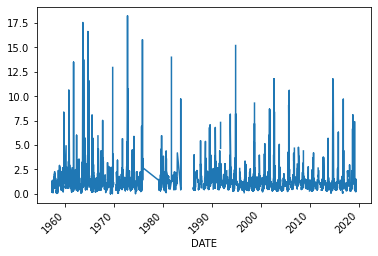

In [41]:
tp_data = df['TP']
tp_data.index = df['DATE']
tp_data.plot(subplots=True)
plt.xticks(rotation=45)

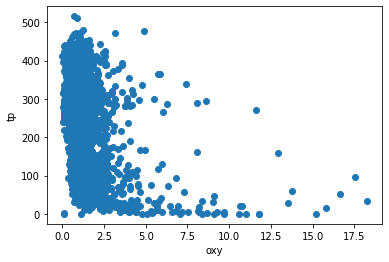

In [43]:
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.scatter(df['TP'],df['OXY'])
plt.xlabel("oxy")
plt.ylabel("tp")
pylab.show()


In [36]:
X = df.drop(['DATE','DEPTH','NO3'], axis=1)
y = df['NO3']
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.1, random_state=0)

model= DecisionTreeRegressor(max_depth=4)

dtr_fit = model.fit(x_train, y_train)

ValueError: ignored

In [ ]:
pd.set_option('display.max_rows', df.shape[0]+1)
print(df)

            DATE  DEPTH     OXY    TP   NO3
1765  10/10/1988    100  262.20  1.45  1.10
1766  10/10/1988   2000  131.30  2.65  4.90
1767  10/10/1988   2500   82.20  3.65  3.60
1768  10/10/1988   1000  194.70  2.00  3.50
1769  10/10/1988   1500  208.10  2.10  4.20
1770  10/10/1988    500  262.20  1.35  1.00
1997  12/12/1991   2000  226.00  1.89  2.60
1998  12/12/1991    100  362.60  2.11  0.10
1999  12/12/1991   1500  250.10  1.94  2.20
2000  12/12/1991   1000  289.80  2.03  1.50
2001  12/12/1991    500  352.40  2.06  0.30
2002  12/12/1991   2600  105.40  1.93  2.70
2003  12/12/1991   2500  149.20  1.76  3.00
2388  12/12/1994   1500  286.60  1.04  3.80
2389  12/12/1994   2600  245.00  1.19  3.80
2390  12/12/1994    100  319.50  1.16  2.80
2391  12/12/1994   2000  272.80  1.11  3.80
2392  12/12/1994    500  300.80  1.14  3.50
2393  12/12/1994   1000  284.30  1.05  3.70
2394  12/12/1994   2500  259.60  1.13  3.70
5450  12/12/2006   2500  284.50  1.64  5.47
5458  12/12/2006   1000  300.90 

In [ ]:
# df['TP'][2000:] + 1,df['OXY'][2000:] + 50
test_df = df.loc[:, ['OXY', 'TP']][5:]
test_df['TP']= test_df['TP'] 
test_df['OXY'] = test_df['OXY']


In [ ]:
ya=dtr_fit.predict(test_df)
# display(pd.DataFrame(ya,columns=['rate']))


X2 = df.drop(['DATE','DEPTH','NO3'], axis=1)
y2 = df[['TP','OXY','NO3']]

x_train2, x_test2, y_train2, y_test2= train_test_split(X2, y2, test_size= 3, random_state=0)

mor = MultiOutputRegressor(XGBRegressor(objective='reg:linear'))

mor.fit(x_train2, y_train2)


pre=mor.predict(test_df)
print(pd.DataFrame(pre,columns=['TP','OXY','NO3']))
pre_df = pd.DataFrame(pre,columns=['TP','OXY','NO3'])

[14:48:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
          TP         OXY       NO3
0   1.353432  262.155365  1.168708
1   1.888752  225.884293  2.586317
2   2.108294  361.144409  0.077628
3   1.939855  250.863235  2.281073
4   2.029436  289.490570  1.628811
5   2.028653  361.144409 -0.458035
6   3.533022   82.442924  2.916532
7   1.760952  149.379044  3.112460
8   1.041147  286.612335  3.773057
9   1.190414  244.462189  3.709070
10  1.159826  319.556793  2.645212
11  1.110731  272.842987  3.753994
12  1.140007  300.797760  3.560016
13  1.051041  284.299377  3.744248
14  1.130820  259.821991  3.620175
15  1.635368  284.423065  5.266745
16  1.761541  300.677856

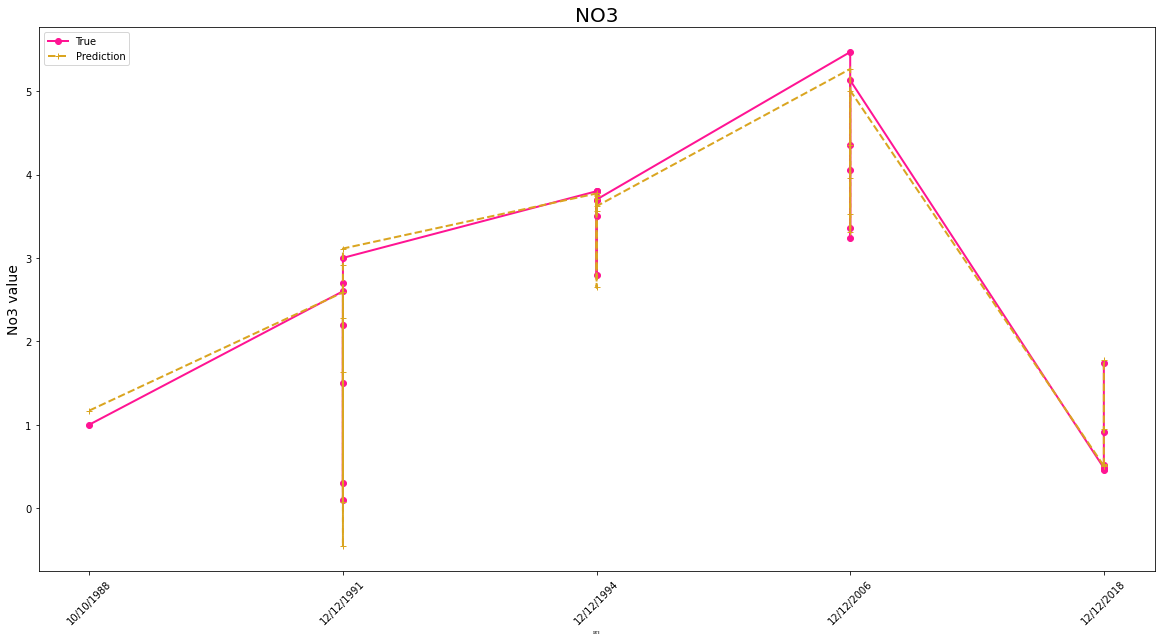

In [ ]:
plt.figure(figsize=(20,10))
plt.title('NO3',fontsize=20,)
plt.xlabel('DATE',fontsize=3)
plt.xticks(rotation=45)
plt.ylabel('No3 value',fontsize=14)
 

plt.plot(df['DATE'][5:],df['NO3'][5:],color="deeppink",linewidth=2,linestyle='-',label='True', marker='o')
plt.plot(df['DATE'][5:],pre_df['NO3'],color="goldenrod",linewidth=2,linestyle='--',label='Prediction', marker='+')
 
plt.legend(loc=2)
plt.show()
